In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

df = pd.read_csv('CC GENERAL.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [101]:
data = df.drop('CUST_ID', axis=1)
data.fillna(data.median(numeric_only=True), inplace=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

In [102]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [103]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

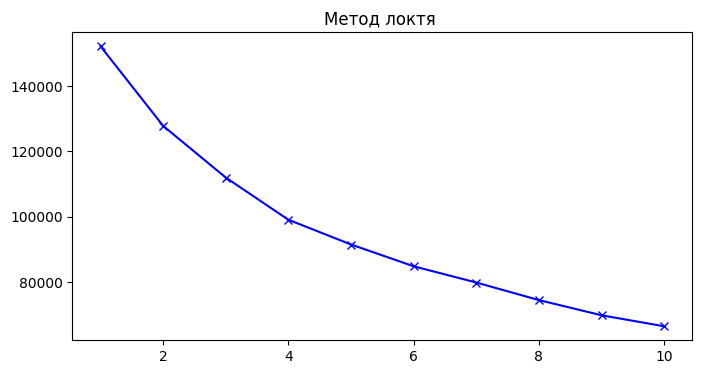

In [104]:
inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, 'bx-')
plt.title('Метод локтя ')
plt.show()

In [105]:
# K-Means
km_raw = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_km_raw = km_raw.fit_predict(X_scaled)
print(f"Распределение: {pd.Series(labels_km_raw).value_counts().sort_index().values}")

Распределение: [3977  409 1197 3367]


In [106]:
# K-Means с PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
km_pca = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_km_pca = km_pca.fit_predict(X_pca)
print(f"Распределение (С PCA):   {pd.Series(labels_km_pca).value_counts().sort_index().values}")


Распределение (С PCA):   [3918 3284 1246  502]


In [107]:
# DBSCAN
db_raw = DBSCAN(eps=2.0, min_samples=5)
labels_db_raw = db_raw.fit_predict(X_scaled)
print(f"Шумы: {list(labels_db_raw).count(-1)}")

Шумы: 599


In [108]:
# DBSCAN с PCA
db_pca = DBSCAN(eps=0.5, min_samples=5)
labels_db_pca = db_pca.fit_predict(X_pca)
print(f"Шумы (С PCA):   {list(labels_db_pca).count(-1)}")

Шумы (С PCA):   134


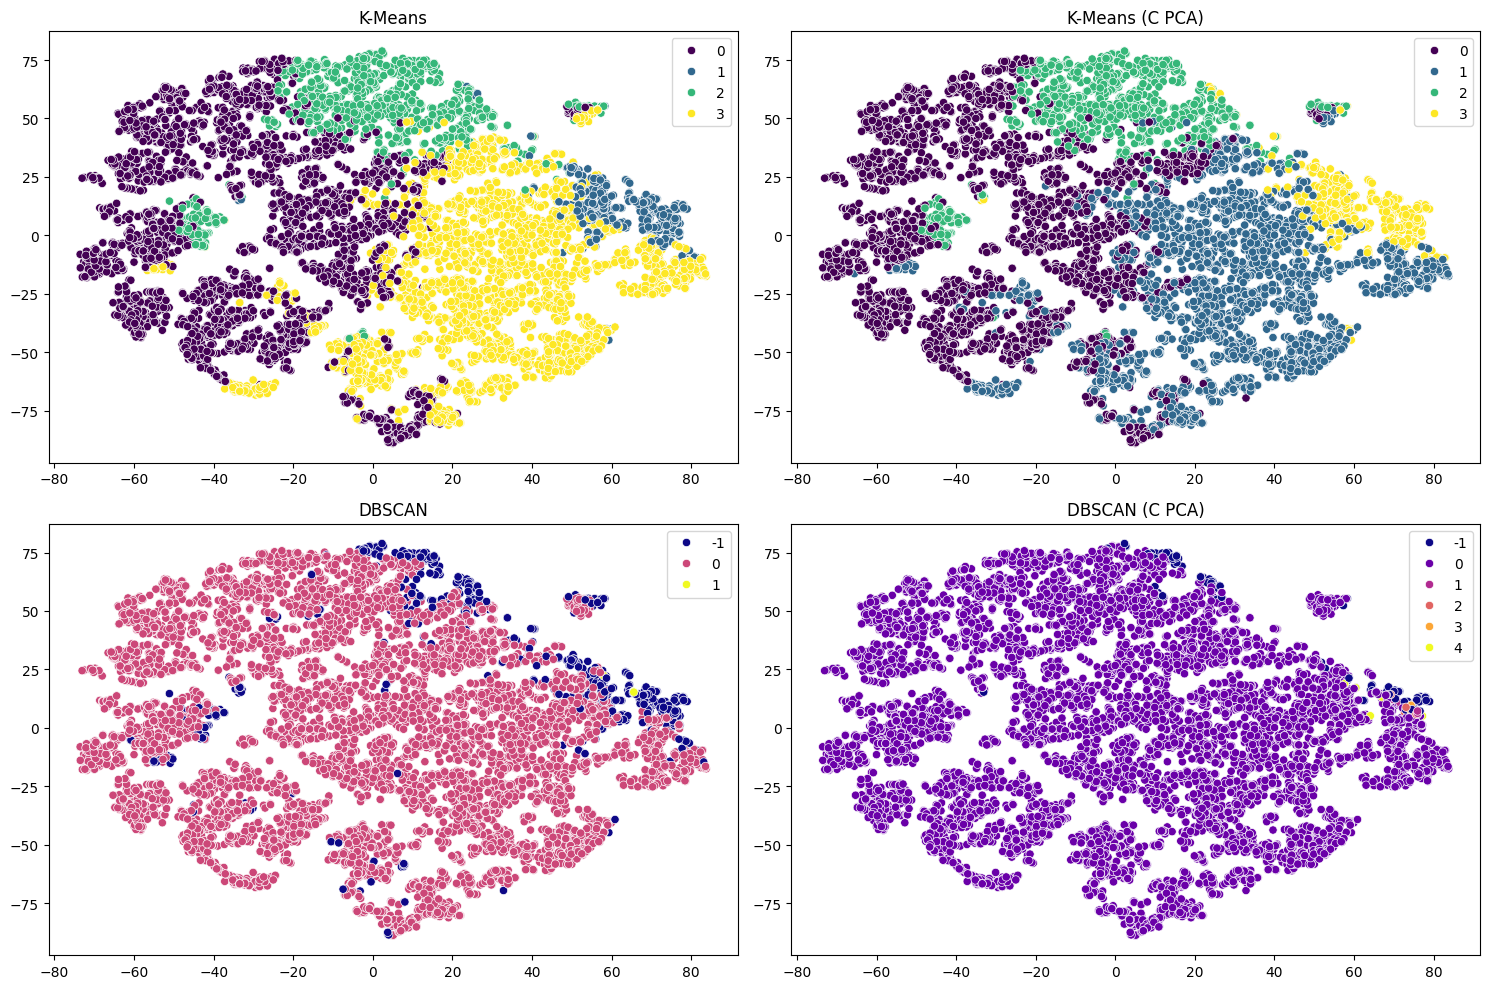

In [109]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=labels_km_raw, ax=axes[0,0], palette='viridis').set_title('K-Means')
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=labels_km_pca, ax=axes[0,1], palette='viridis').set_title('K-Means (С PCA)')
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=labels_db_raw, ax=axes[1,0], palette='plasma').set_title('DBSCAN')
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=labels_db_pca, ax=axes[1,1], palette='plasma').set_title('DBSCAN (С PCA)')
plt.tight_layout()
plt.show()

In [110]:
stats = pd.DataFrame({
    "Кластер": ["Шум (-1)", "0", "1", "2", "3"],
    "KM": pd.Series(labels_km_raw).value_counts().reindex([-1,0,1,2,3], fill_value=0).values,
    "KM_С_PCA":   pd.Series(labels_km_pca).value_counts().reindex([-1,0,1,2,3], fill_value=0).values,
    "DB": pd.Series(labels_db_raw).value_counts().reindex([-1,0,1,2,3], fill_value=0).values,
    "DB_С_PCA":   pd.Series(labels_db_pca).value_counts().reindex([-1,0,1,2,3], fill_value=0).values
})
print(stats.to_string(index=False))

 Кластер   KM  KM_С_PCA   DB  DB_С_PCA
Шум (-1)    0         0  599       134
       0 3977      3918 8346      8790
       1  409      3284    5         8
       2 1197      1246    0         6
       3 3367       502    0         6


In [111]:
# PCA без корокби
U, S, Vt = np.linalg.svd(X_scaled, full_matrices=False)
X_manual_pca = U[:, :2] * S[:2]
km_manual = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_manual_pca = km_manual.fit_predict(X_manual_pca)

In [112]:
diff = np.abs(np.abs(X_pca) - np.abs(X_manual_pca)).sum()
print(f"Разница в координатах: {diff:.10f}") 

Разница в координатах: 0.0000000001


In [113]:
comparison_manual = pd.DataFrame({
    "Кластер": ["0", "1", "2", "3"],
    "KMeans_Sklearn": pd.Series(labels_km_pca).value_counts().sort_index().values,
    "KMeans_My":  pd.Series(labels_manual_pca).value_counts().sort_index().values
})
print(comparison_manual.to_string(index=False))

Кластер  KMeans_Sklearn  KMeans_My
      0            3918       3918
      1            3284       3284
      2            1246       1246
      3             502        502
